In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('D:\GitHub\Lab2Analyze\Lab2Analyze\Dataset_Food'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:\GitHub\Lab2Analyze\Lab2Analyze\Dataset_Food\evaluation\food\0.jpg
D:\GitHub\Lab2Analyze\Lab2Analyze\Dataset_Food\evaluation\food\1.jpg
D:\GitHub\Lab2Analyze\Lab2Analyze\Dataset_Food\evaluation\food\10.jpg
D:\GitHub\Lab2Analyze\Lab2Analyze\Dataset_Food\evaluation\food\100.jpg
D:\GitHub\Lab2Analyze\Lab2Analyze\Dataset_Food\evaluation\food\101.jpg
D:\GitHub\Lab2Analyze\Lab2Analyze\Dataset_Food\evaluation\food\102.jpg
D:\GitHub\Lab2Analyze\Lab2Analyze\Dataset_Food\evaluation\food\103.jpg
D:\GitHub\Lab2Analyze\Lab2Analyze\Dataset_Food\evaluation\food\104.jpg
D:\GitHub\Lab2Analyze\Lab2Analyze\Dataset_Food\evaluation\food\105.jpg
D:\GitHub\Lab2Analyze\Lab2Analyze\Dataset_Food\evaluation\food\106.jpg
D:\GitHub\Lab2Analyze\Lab2Analyze\Dataset_Food\evaluation\food\107.jpg
D:\GitHub\Lab2Analyze\Lab2Analyze\Dataset_Food\evaluation\food\108.jpg
D:\GitHub\Lab2Analyze\Lab2Analyze\Dataset_Food\evaluation\food\109.jpg
D:\GitHub\Lab2Analyze\Lab2Analyze\Dataset_Food\evaluation\food\11.jpg
D:\GitHub\La

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, Model, Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping
import tensorflow as tf
import json
import os

In [ ]:
im_height = 224
im_width = 224
batch_size = 128
epochs = 5

In [ ]:
image_path = "D:/GitHub/Lab2Analyze/Lab2Analyze/Dataset_Food/"  # flower data set path
train_dir = image_path + "training"
validation_dir = image_path + "validation"
test_dir = image_path + "evaluation"
# data generator with data augmentation
train_image_generator = ImageDataGenerator( rescale=1./255, 
                                            rotation_range=40, 
                                            width_shift_range=0.2,
                                            height_shift_range=0.2, 
                                            zoom_range=0.2,
                                            horizontal_flip=True, 
                                            fill_mode='nearest')


validation_image_generator = ImageDataGenerator(rescale=1./255)


test_image_generator = ImageDataGenerator(rescale=1./255)


train_data_gen = train_image_generator.flow_from_directory(directory=train_dir,
                                                           batch_size=batch_size,
                                                           shuffle=True,
                                                           target_size=(im_height, im_width),
                                                           class_mode='categorical')
total_train = train_data_gen.n

# get class dict
class_indices = train_data_gen.class_indices

# transform value and key of dict
inverse_dict = dict((val, key) for key, val in class_indices.items())
# write dict into json file
json_str = json.dumps(inverse_dict, indent=4)
with open('class_indices.json', 'w') as json_file:
    json_file.write(json_str)

val_data_gen = validation_image_generator.flow_from_directory(directory=validation_dir,
                                                              batch_size=batch_size,
                                                              shuffle=False,
                                                              target_size=(im_height, im_width),
                                                              class_mode='categorical')
total_val = val_data_gen.n

test_data_gen = test_image_generator.flow_from_directory( directory=test_dir,
                                                          target_size=(im_height, im_width))

total_test = test_data_gen.n

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
covn_base = tf.keras.applications.xception.Xception(weights='imagenet',include_top=False)
covn_base.trainable = True

for layers in covn_base.layers[:-32]:
    layers.trainable = False

model = tf.keras.Sequential()
model.add(covn_base)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(2))


model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=["accuracy"])

83683744/83683744 [==============================] - 10s 0us/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, None, None, 2048)  20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_12 (Dense)            (None, 2)                 4098      
                                                                 
Total params: 20,865,578
Trainable params: 9,482,442
Non-trainable params: 11,383,136
_________________________________________________________________


In [ ]:
Early_sp = EarlyStopping(monitor = 'val_accuracy', patience = 5,restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1)

history = model.fit(x=train_data_gen,
                    steps_per_epoch=total_train // batch_size,
                    epochs=epochs,
                    validation_data=val_data_gen,
                    validation_steps=total_val // batch_size,
                    callbacks=[Early_sp,reduce_lr])

Epoch 1/5
23/23 [==============================] - 346s 15s/step - loss: 0.3289 - accuracy: 0.9237 - val_loss: 0.0577 - val_accuracy: 0.9821 - lr: 1.0000e-04
Epoch 2/5
23/23 [==============================] - 343s 15s/step - loss: 0.0865 - accuracy: 0.9774 - val_loss: 0.0342 - val_accuracy: 0.9900 - lr: 1.0000e-04
Epoch 3/5
23/23 [==============================] - 342s 15s/step - loss: 0.0490 - accuracy: 0.9868 - val_loss: 0.0311 - val_accuracy: 0.9888 - lr: 1.0000e-04
Epoch 4/5
23/23 [==============================] - 345s 15s/step - loss: 0.0355 - accuracy: 0.9892 - val_loss: 0.0287 - val_accuracy: 0.9911 - lr: 1.0000e-04
Epoch 5/5
23/23 [==============================] - 341s 15s/step - loss: 0.0308 - accuracy: 0.9920 - val_loss: 0.0335 - val_accuracy: 0.9900 - lr: 1.0000e-04


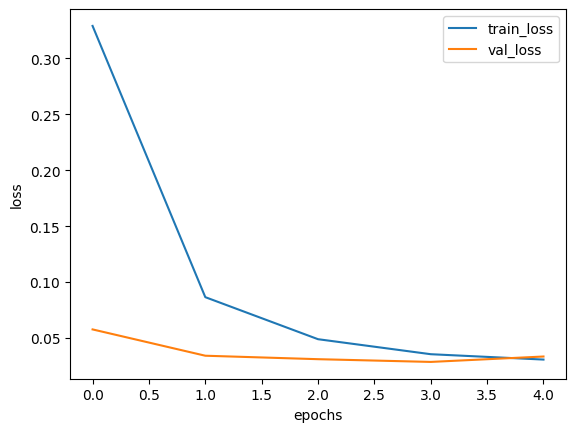

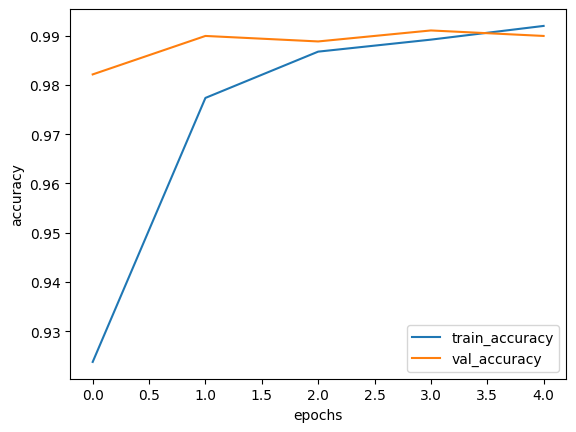

In [ ]:
history_dict = history.history
train_loss = history_dict["loss"]
train_accuracy = history_dict["accuracy"]
val_loss = history_dict["val_loss"]
val_accuracy = history_dict["val_accuracy"]

# figure 1
plt.figure()
plt.plot(range(epochs), train_loss, label='train_loss')
plt.plot(range(epochs), val_loss, label='val_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

# figure 2
plt.figure()
plt.plot(range(epochs), train_accuracy, label='train_accuracy')
plt.plot(range(epochs), val_accuracy, label='val_accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [ ]:
scores = model.evaluate(test_data_gen, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

32/32 [==============================] - 58s 2s/step - loss: 0.0261 - accuracy: 0.9910
Test loss: 0.02610851638019085
Test accuracy: 0.9909999966621399


In [ ]:
model.evaluate_generator(test_data_gen,steps=len(test_data_gen))

C:\Users\boss\AppData\Local\Temp\ipykernel_15148\220610160.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_data_gen,steps=len(test_data_gen))


[0.026108520105481148, 0.9909999966621399]